In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from Plotting.Plots import getCBoxPlots, getTableOfScatters, removeOutliers, getHeatMap, get3DChart
from sklearn import preprocessing

In [2]:
df = pd.read_csv("datos_tec.csv")

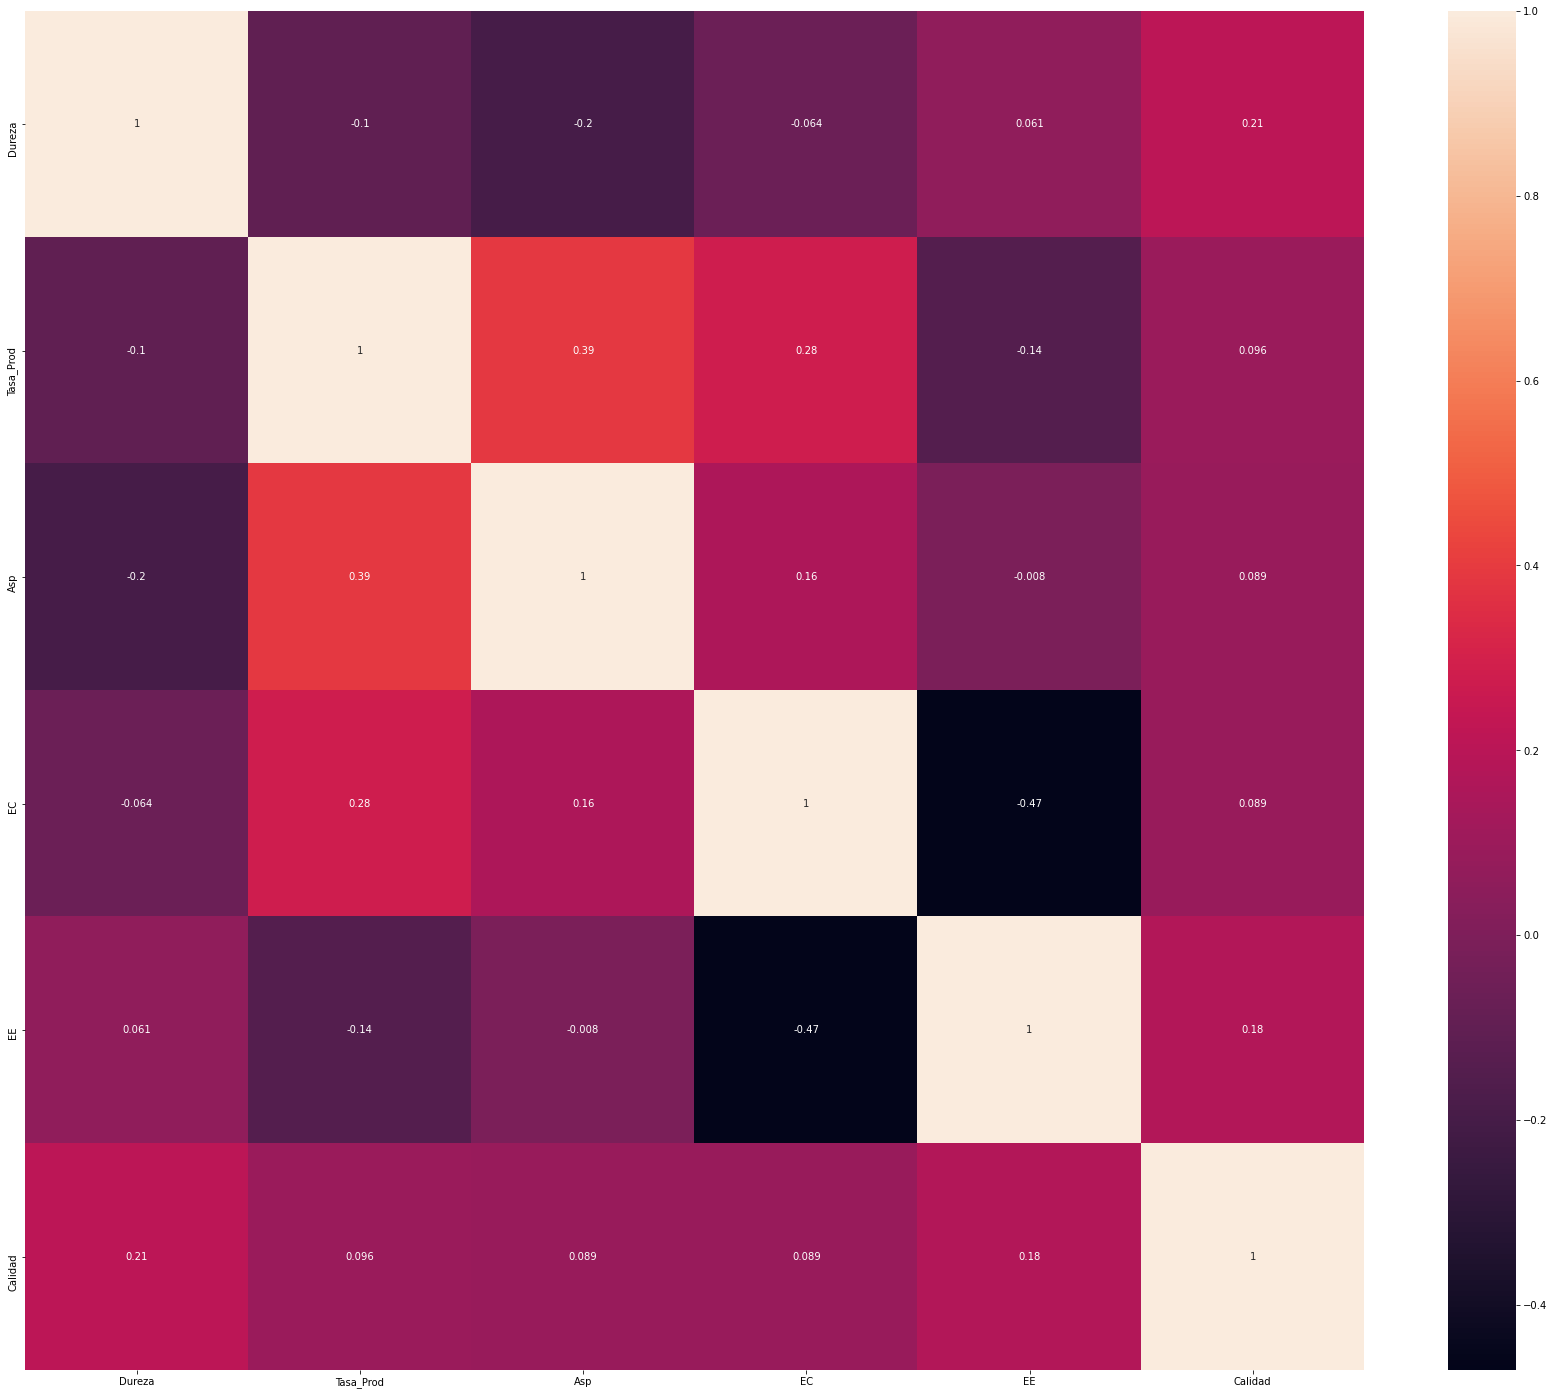

In [3]:
getHeatMap(df, 'spearman')

In [4]:
#getTableOfScatters(df)

In [5]:
df.describe()

Dureza    Tasa_Prod          Asp           EC           EE  \
count  9391.000000  9392.000000  9391.000000  9392.000000  9392.000000   
mean    104.028644   391.005111     3.152306    19.362425    19.059135   
std       2.049060    43.352777     0.375251     6.698657     8.035162   
min      80.000000     0.000000     0.090000     0.000000     0.000000   
25%     103.000000   383.000000     3.040000    15.900000    14.200000   
50%     104.000000   398.000000     3.260000    19.200000    20.000000   
75%     105.000000   408.000000     3.380000    23.500000    25.200000   
max     112.000000   480.000000     3.520000    40.400000    35.300000   

           Calidad  
count  9392.000000  
mean      0.089891  
std       0.048819  
min       0.000000  
25%       0.061000  
50%       0.081000  
75%       0.107000  
max       1.000000

## NaN Handling

In [6]:
pd.isna(df).sum()

TIME         0
Dureza       1
Tasa_Prod    0
Asp          1
EC           0
EE           0
Calidad      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df = df.drop(["TIME", "Asp"], axis=1)

In [9]:
pd.isna(df).sum()

Dureza       0
Tasa_Prod    0
EC           0
EE           0
Calidad      0
dtype: int64

## Outliers

In [10]:
getCBoxPlots(df, 0)

<Figure size 432x288 with 0 Axes>

In [11]:
df.shape[0]

9390

In [12]:
df = removeOutliers(df.columns, df)

In [13]:
df["ET"] = df["EE"] + df["EC"]

In [14]:
df.describe()

Dureza    Tasa_Prod           EC           EE      Calidad  \
count  7913.000000  7913.000000  7913.000000  7913.000000  7913.000000   
mean    103.976873   398.091495    20.274005    19.244610     0.083197   
std       1.768688    19.088949     5.250482     7.724014     0.030697   
min     100.000000   344.000000     5.500000     0.000000     0.000000   
25%     103.000000   386.000000    16.600000    14.700000     0.061000   
50%     104.000000   399.000000    19.500000    20.100000     0.080000   
75%     105.000000   410.000000    23.700000    25.100000     0.103000   
max     108.000000   448.000000    34.700000    34.900000     0.173000   

                ET  
count  7913.000000  
mean     39.518615  
std       6.648397  
min       8.500000  
25%      35.400000  
50%      40.300000  
75%      44.300000  
max      56.900000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 9391
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Dureza     7913 non-null   float64
 1   Tasa_Prod  7913 non-null   int64  
 2   EC         7913 non-null   float64
 3   EE         7913 non-null   float64
 4   Calidad    7913 non-null   float64
 5   ET         7913 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 432.7 KB


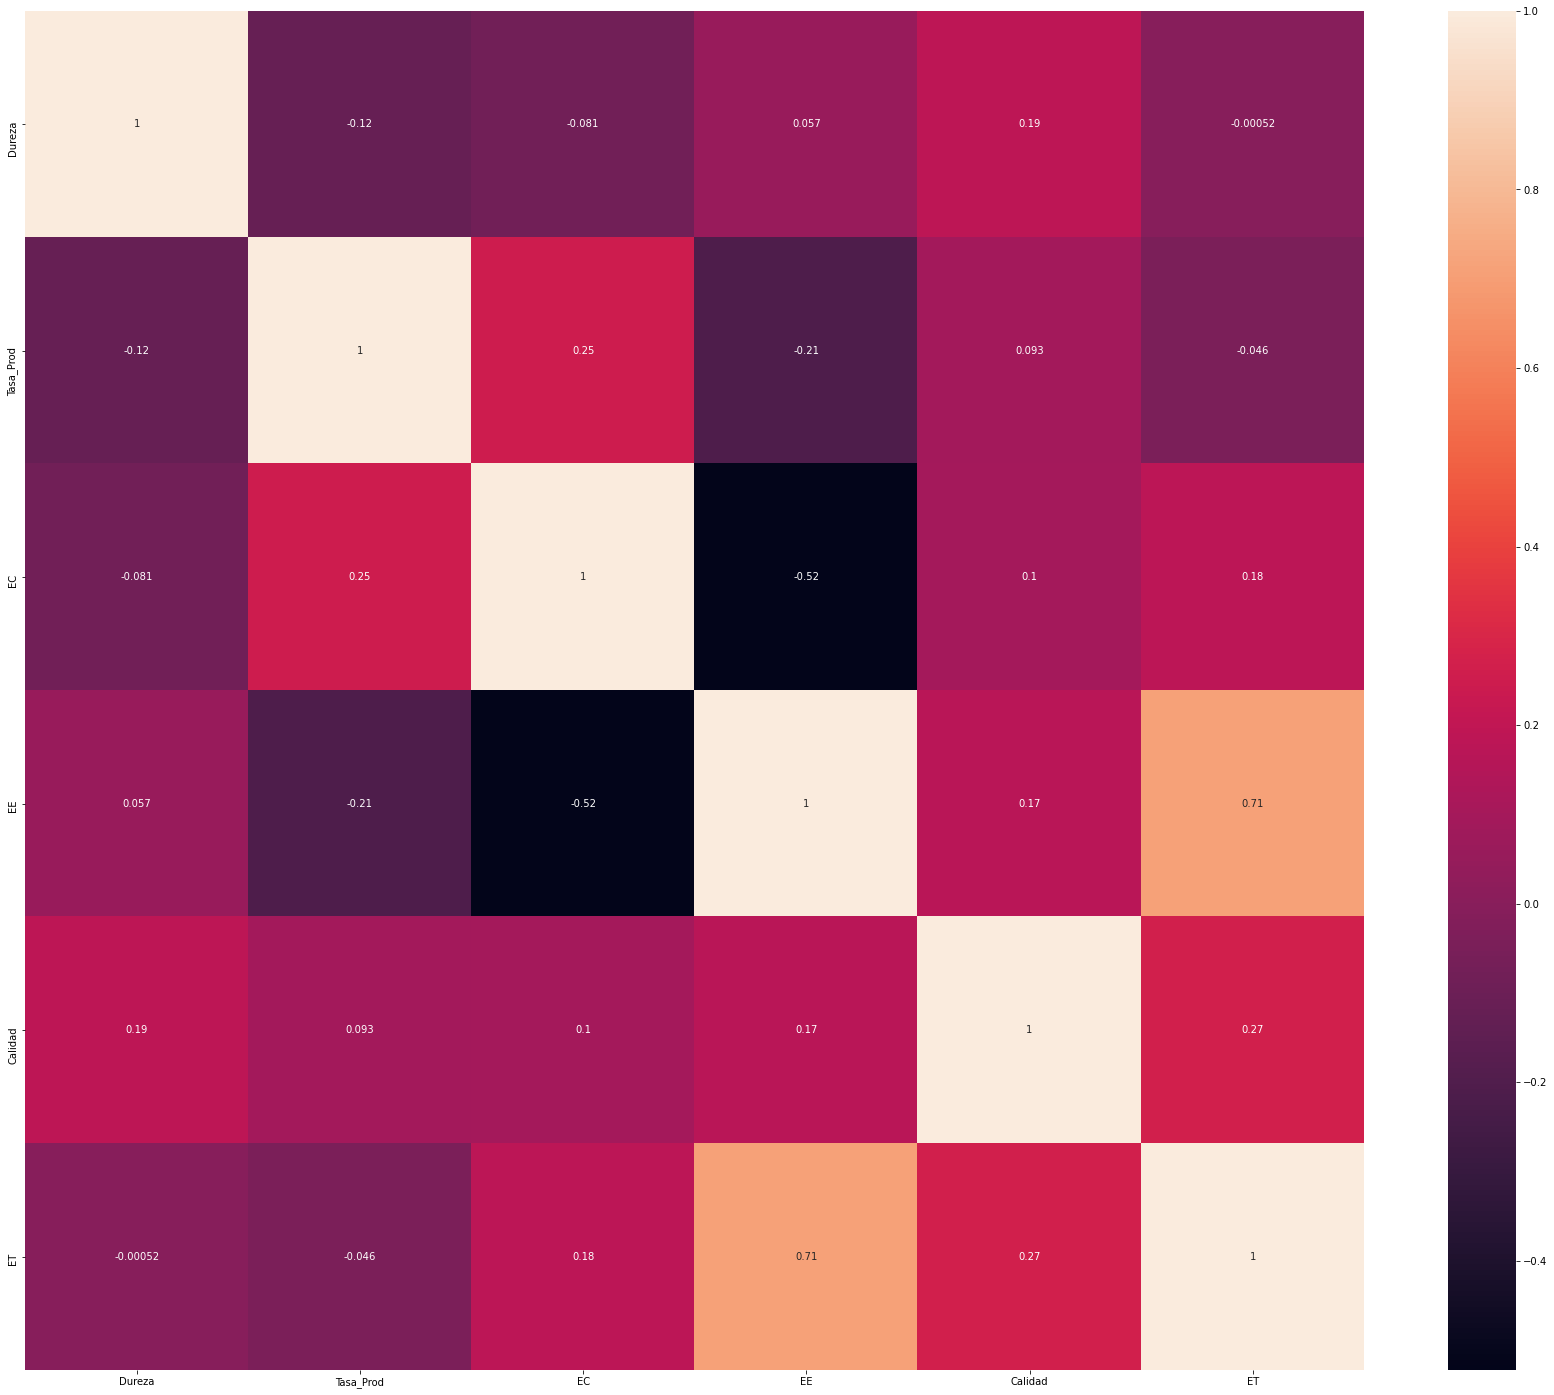

In [16]:
getHeatMap(df, 'spearman')

### Distribución de las variables

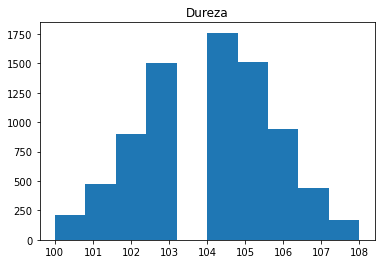

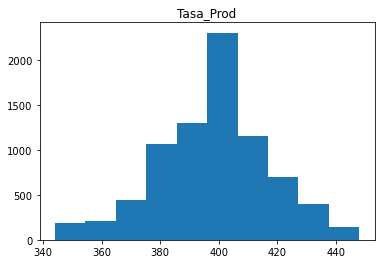

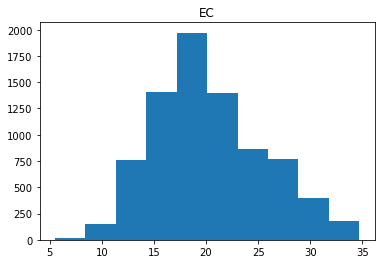

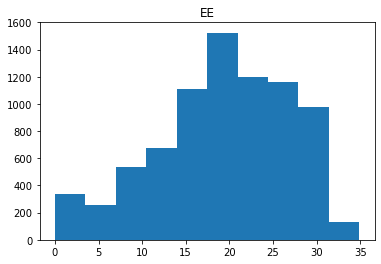

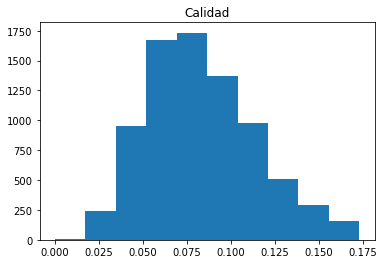

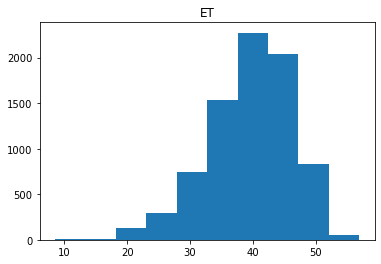

<Figure size 432x288 with 0 Axes>

In [17]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()
    plt.clf()

In [18]:
getCBoxPlots(df, 1)

<Figure size 432x288 with 0 Axes>

In [19]:
df = removeOutliers(["Tasa_Prod", "Calidad"], df)

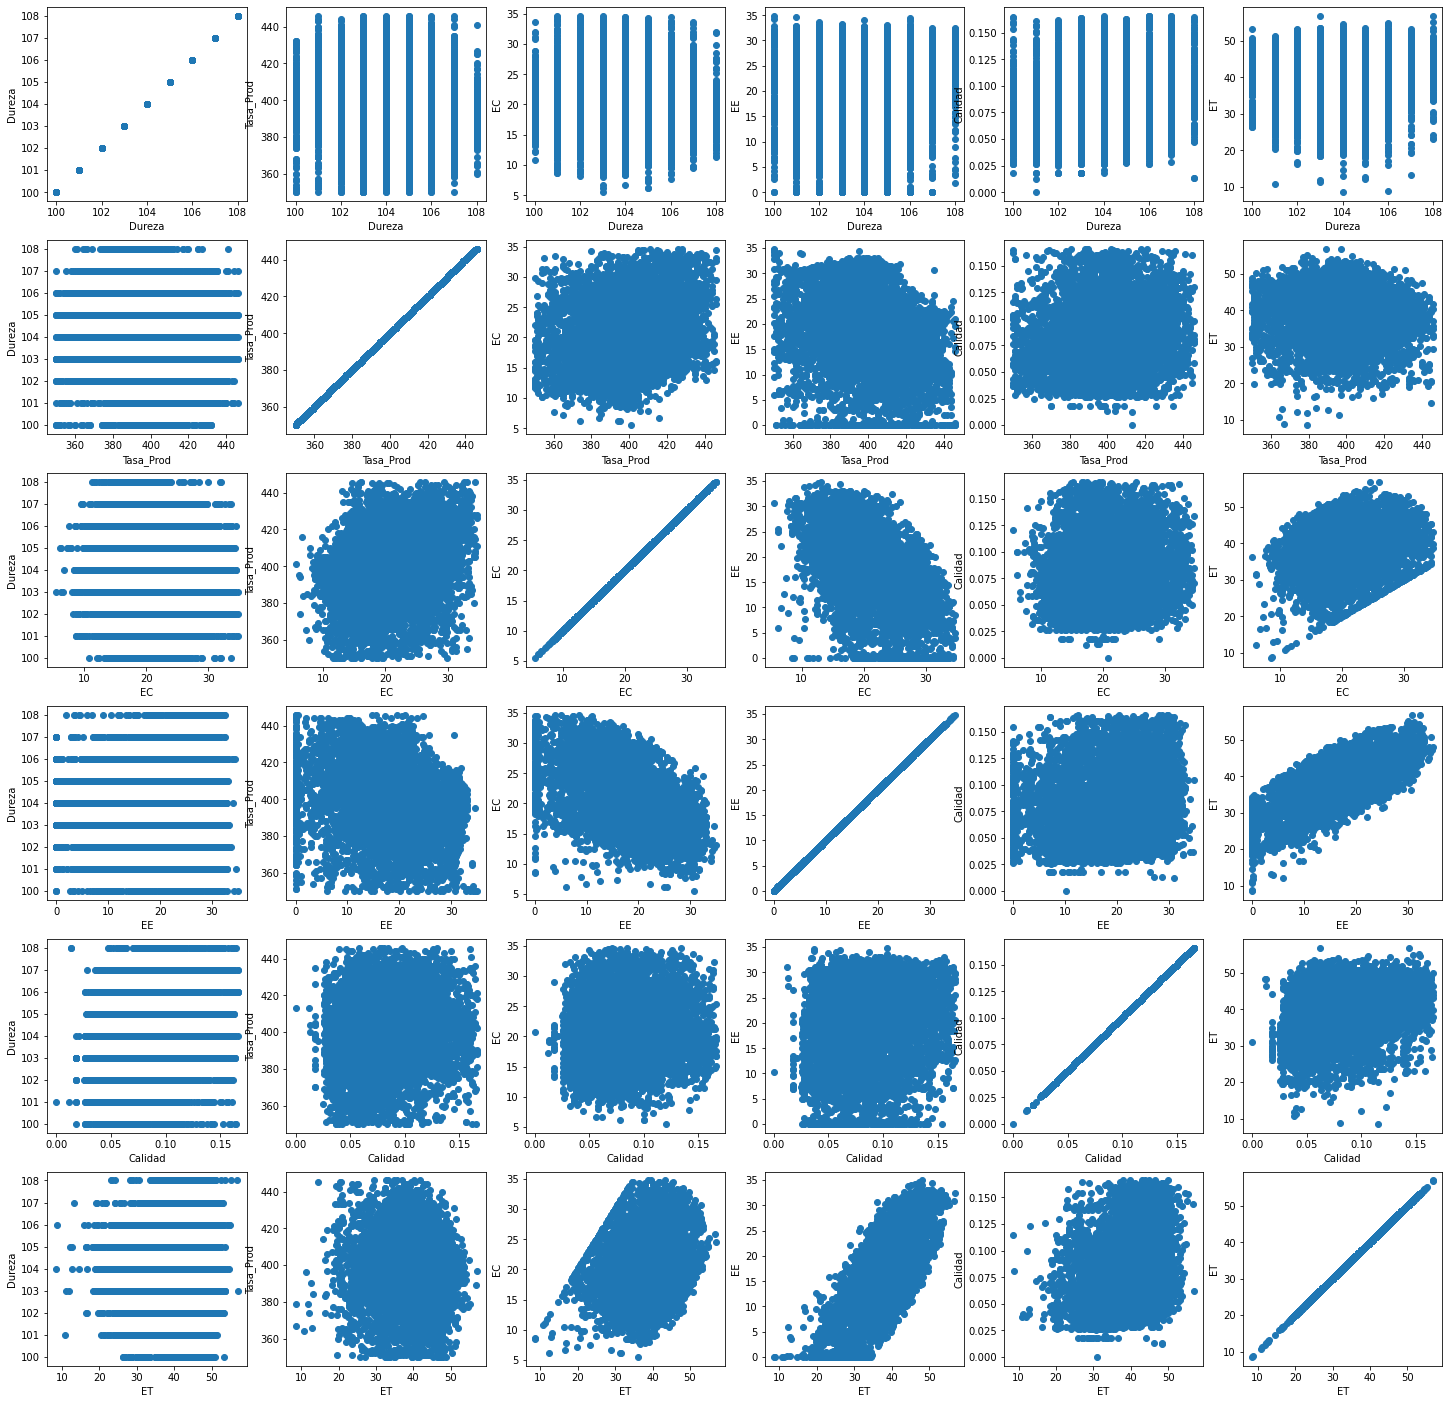

In [20]:
getTableOfScatters(df)

In [21]:
df.shape[0]

7758

In [22]:
getCBoxPlots(df, 2)

<Figure size 432x288 with 0 Axes>

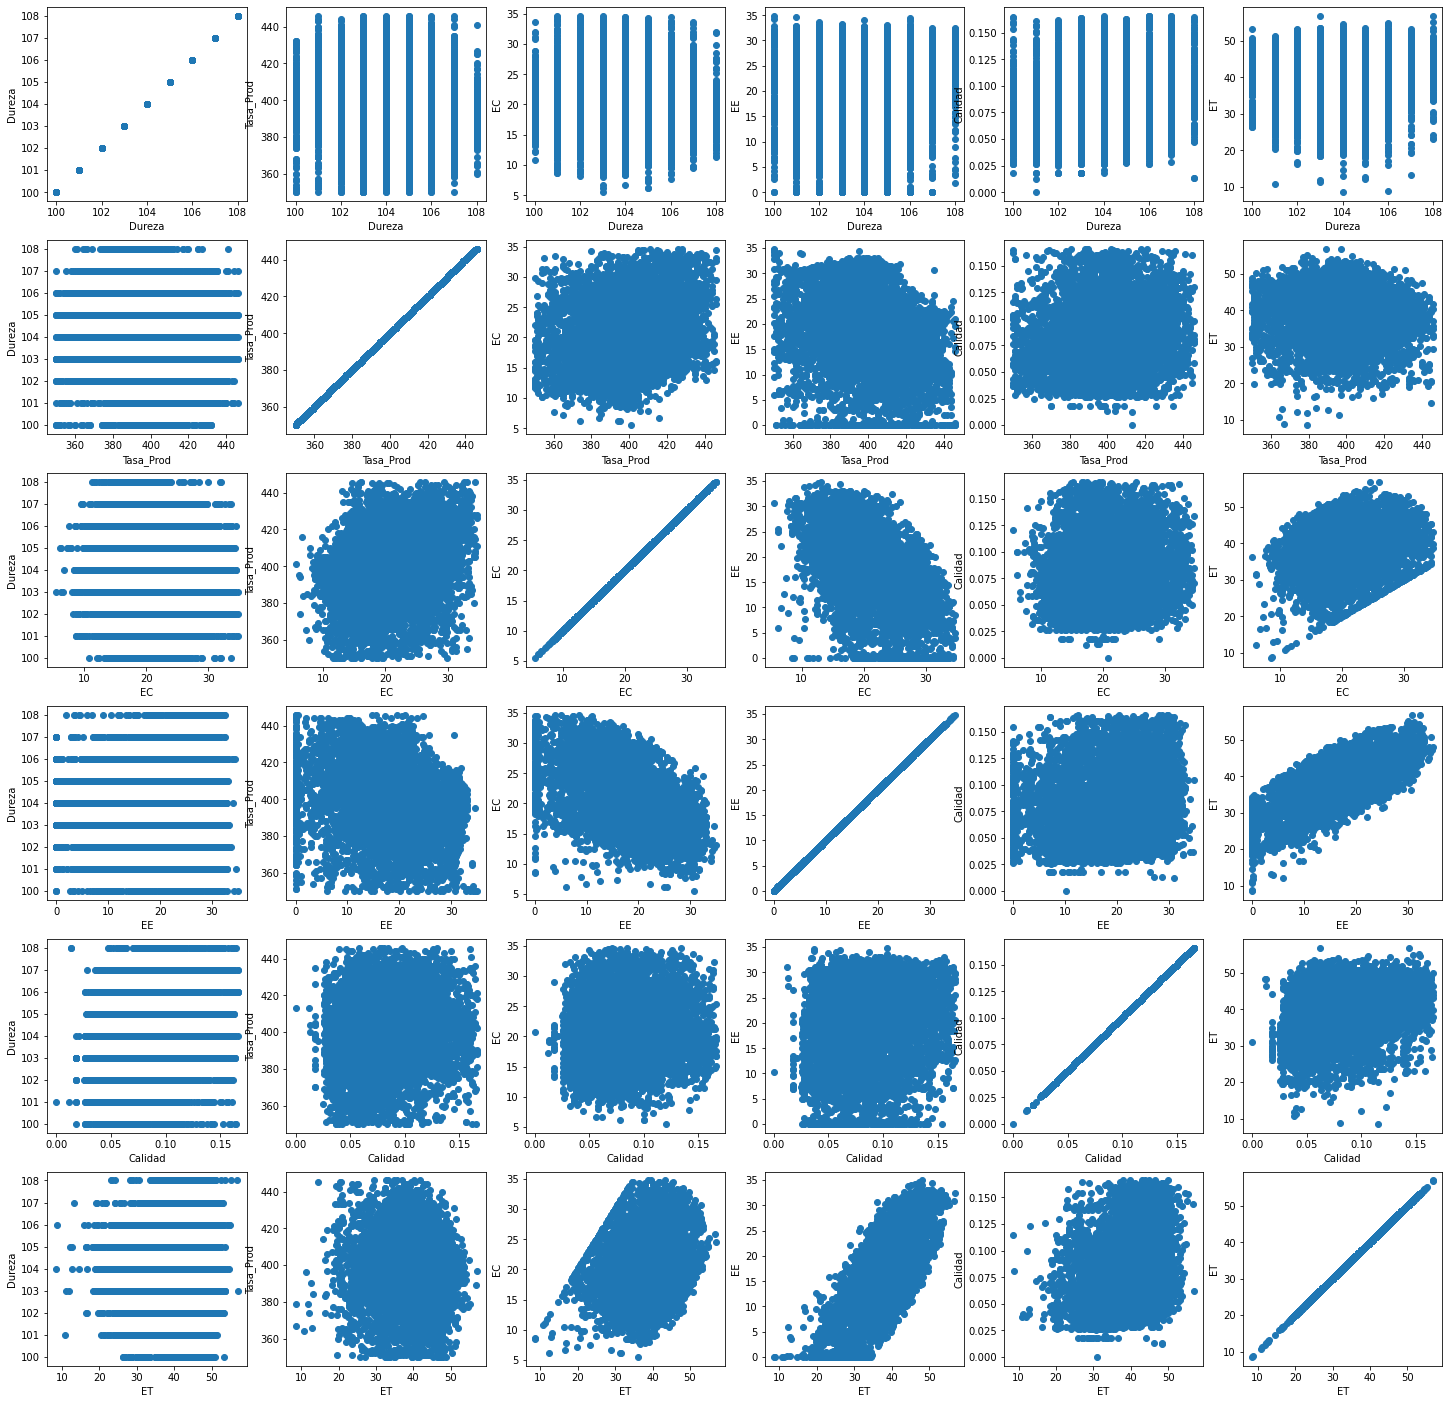

In [23]:
getTableOfScatters(df)

In [24]:
getCBoxPlots(df, 3)

<Figure size 432x288 with 0 Axes>

In [25]:
df = removeOutliers(["Tasa_Prod", "Calidad"], df)

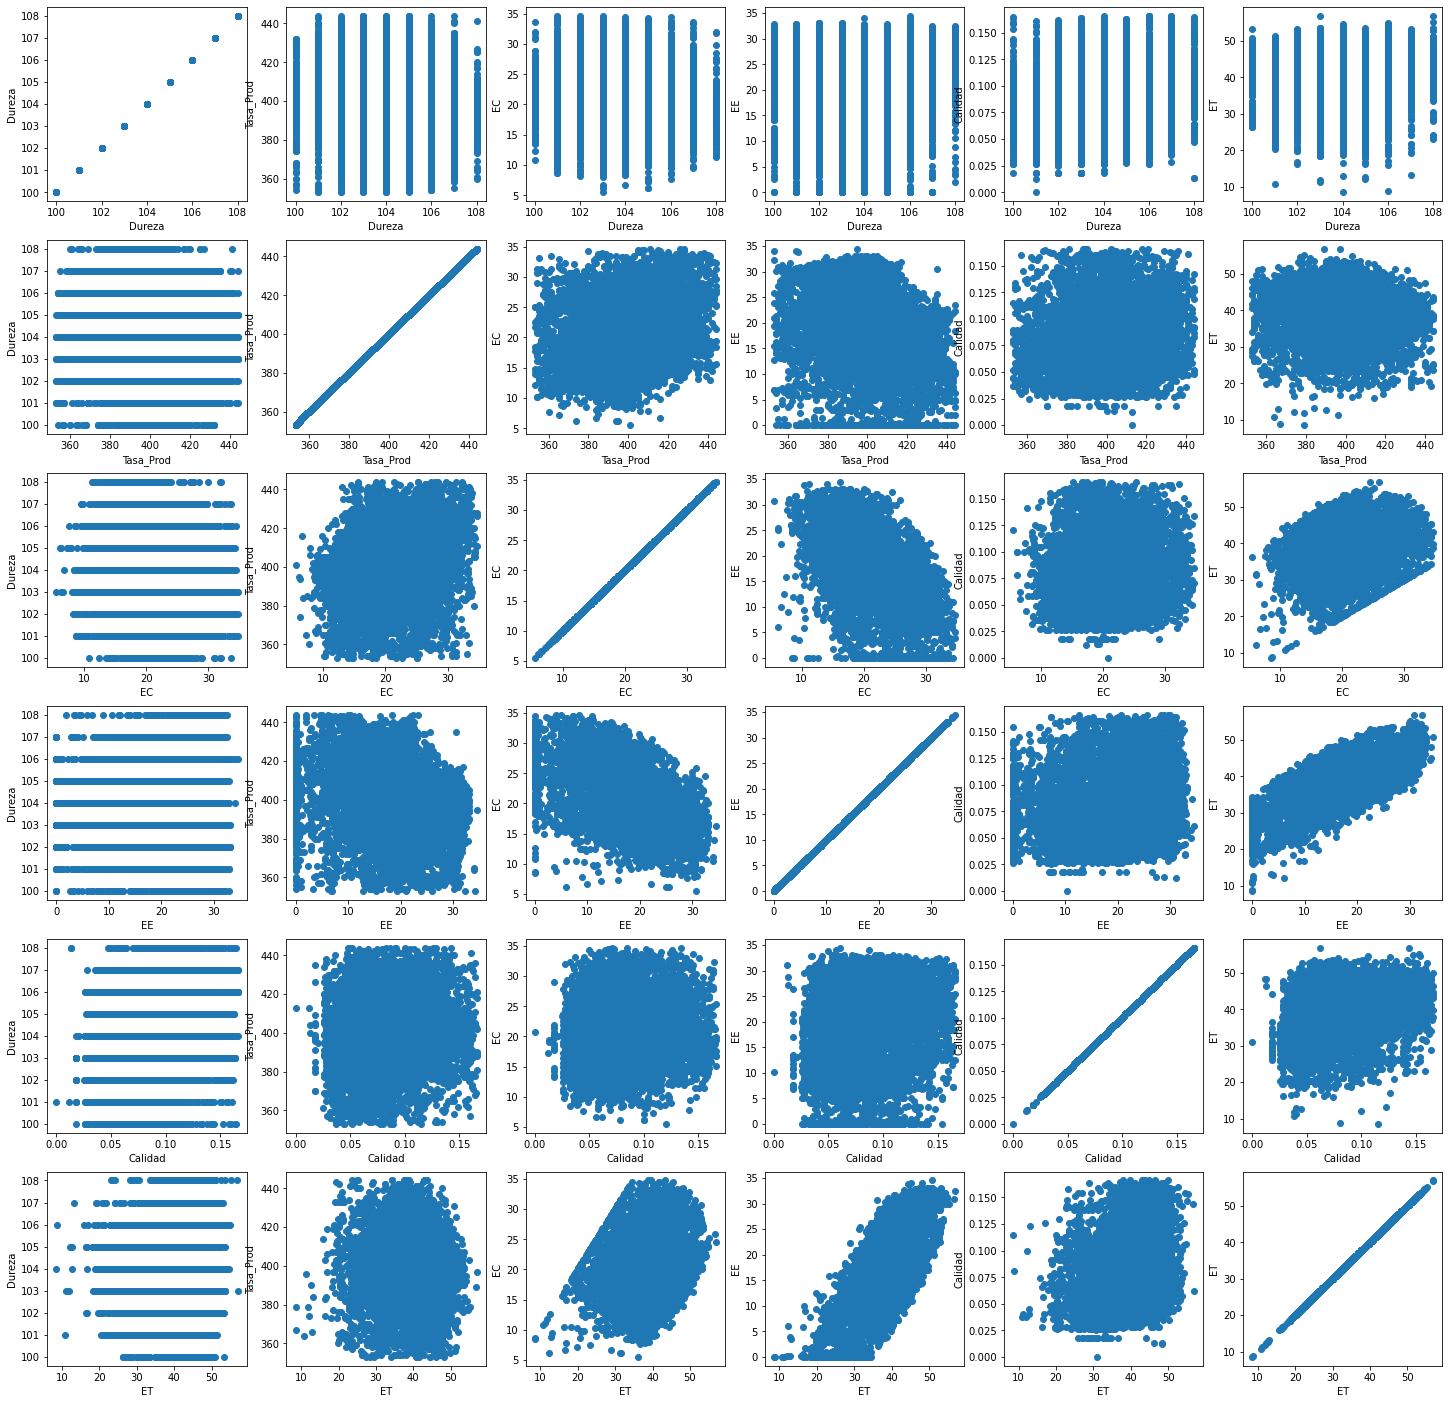

In [26]:
getTableOfScatters(df)

In [27]:
df.shape[0]

7678

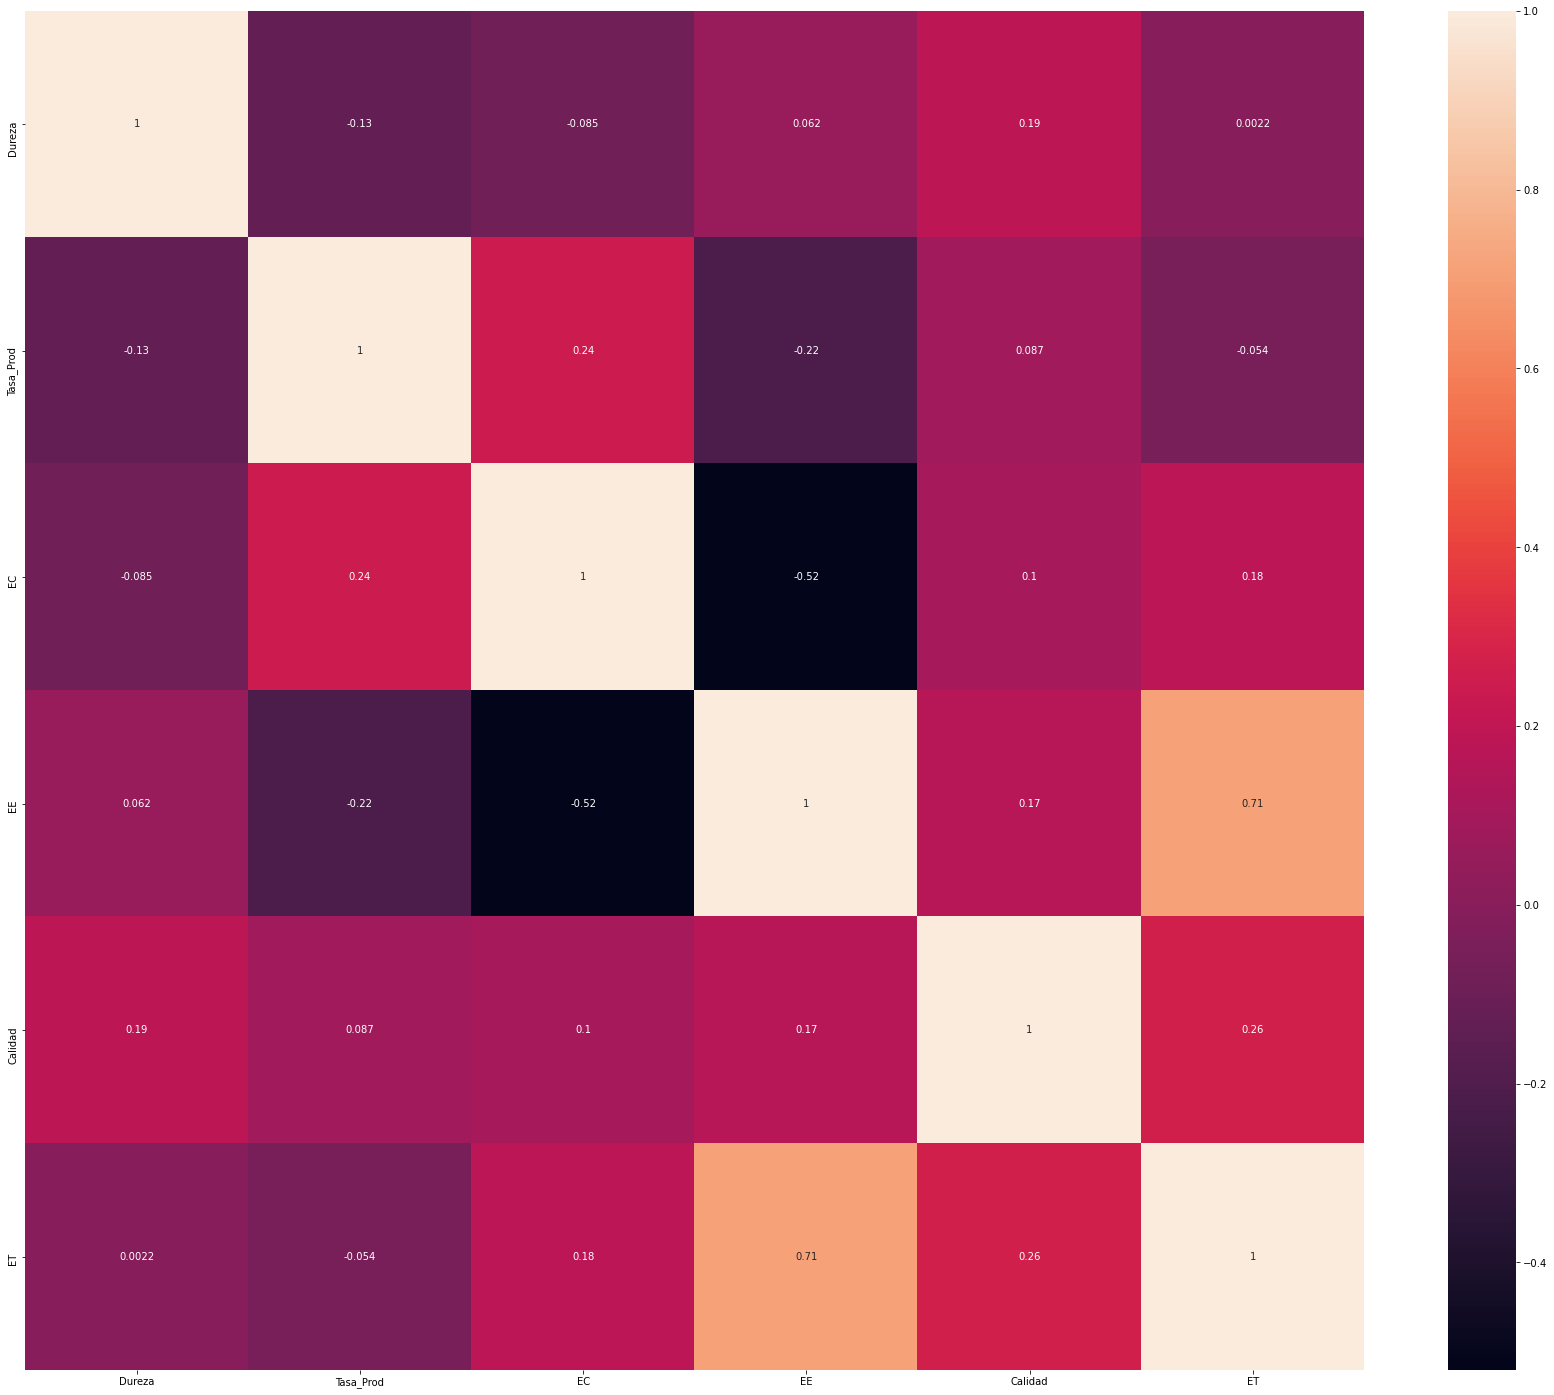

In [28]:
getHeatMap(df, 'spearman')

In [29]:
df.describe()

Dureza    Tasa_Prod           EC           EE      Calidad  \
count  7678.000000  7678.000000  7678.000000  7678.000000  7678.000000   
mean    103.977598   398.962881    20.300000    19.260094     0.082886   
std       1.770989    17.681486     5.232021     7.690175     0.030073   
min     100.000000   353.000000     5.500000     0.000000     0.000000   
25%     103.000000   387.000000    16.600000    14.700000     0.061000   
50%     104.000000   399.000000    19.600000    20.100000     0.080000   
75%     105.000000   410.000000    23.700000    25.100000     0.103000   
max     108.000000   444.000000    34.700000    34.500000     0.166000   

                ET  
count  7678.000000  
mean     39.560094  
std       6.638767  
min       8.500000  
25%      35.500000  
50%      40.300000  
75%      44.400000  
max      56.900000

## Visualización 3D

In [31]:
get3DChart(df, 10, 2, "3DAllCols")

Archivo en: file:///Users/sebastianneri/Documents/4o Semestre/Análisis de Cienca de Datos/Situación Problema/cemexVenturesEnergyEfficiencyModelApp/research/3DAllCols.html


## Estandarización de los datos

In [32]:
sScaler = preprocessing.StandardScaler()

In [33]:
df = pd.DataFrame(sScaler.fit_transform(df), columns=df.columns)
df.head()

Dureza  Tasa_Prod        EC        EE   Calidad        ET
0 -2.246123  -1.751261 -0.993945  1.357653 -0.993863  0.789340
1 -2.246123   1.529220  1.261545 -2.504670  0.835159 -1.907119
2 -1.116736  -1.072541 -0.535201  0.954515 -1.060372  0.683892
3  0.577343  -0.337261  1.108630 -2.504670  1.832807 -2.027631
4  1.706730   0.228340  1.662946 -2.114536  1.533512 -1.138854

In [34]:
df.describe()

Dureza     Tasa_Prod            EC            EE       Calidad  \
count  7.678000e+03  7.678000e+03  7.678000e+03  7.678000e+03  7.678000e+03   
mean  -1.717766e-15 -2.993900e-16  1.117185e-15  2.518688e-15 -9.728550e-17   
std    1.000065e+00  1.000065e+00  1.000065e+00  1.000065e+00  1.000065e+00   
min   -2.246123e+00 -2.599661e+00 -2.828919e+00 -2.504670e+00 -2.756374e+00   
25%   -5.520431e-01 -6.766207e-01 -7.072298e-01 -5.930152e-01 -7.278231e-01   
50%    1.265007e-02  2.099454e-03 -1.338002e-01  1.092252e-01 -9.597933e-02   
75%    5.773432e-01  6.242596e-01  6.498868e-01  7.594478e-01  6.688841e-01   
max    2.271423e+00  2.547300e+00  2.752462e+00  1.981866e+00  2.763945e+00   

                 ET  
count  7.678000e+03  
mean   5.847107e-16  
std    1.000065e+00  
min   -4.678898e+00  
25%   -6.116133e-01  
50%    1.114596e-01  
75%    7.290844e-01  
max    2.612087e+00

In [36]:
Y = df[["EC", "EE", "ET"]]
X = df.drop(["EE", "ET", "EC"], axis=1)

In [38]:
Y.describe()

EC            EE            ET
count  7.678000e+03  7.678000e+03  7.678000e+03
mean   1.117185e-15  2.518688e-15  5.847107e-16
std    1.000065e+00  1.000065e+00  1.000065e+00
min   -2.828919e+00 -2.504670e+00 -4.678898e+00
25%   -7.072298e-01 -5.930152e-01 -6.116133e-01
50%   -1.338002e-01  1.092252e-01  1.114596e-01
75%    6.498868e-01  7.594478e-01  7.290844e-01
max    2.752462e+00  1.981866e+00  2.612087e+00

In [39]:
X.describe()

Dureza     Tasa_Prod       Calidad
count  7.678000e+03  7.678000e+03  7.678000e+03
mean  -1.717766e-15 -2.993900e-16 -9.728550e-17
std    1.000065e+00  1.000065e+00  1.000065e+00
min   -2.246123e+00 -2.599661e+00 -2.756374e+00
25%   -5.520431e-01 -6.766207e-01 -7.278231e-01
50%    1.265007e-02  2.099454e-03 -9.597933e-02
75%    5.773432e-01  6.242596e-01  6.688841e-01
max    2.271423e+00  2.547300e+00  2.763945e+00

## Clusterización

Text(0, 0.5, 'Distancia Euclideana')

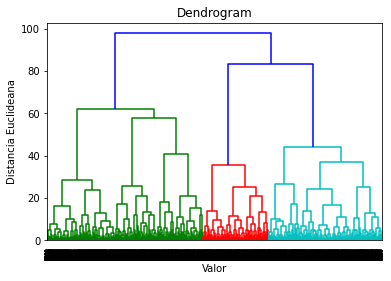

In [45]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Valor')
plt.ylabel('Distancia Euclideana')

A partir del dendrograma anterior podemos ver que se pueden dividir perfectamente los datos en 5 clusters, pues estos agrupan de manera más representativa a los datos.

In [43]:
import plotly.figure_factory as ff
dendogram_pl = ff.create_dendrogram(X, color_threshold=5.5)
dendogram_pl.update_layout(width=800, height=500)
dendogram_pl.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage="ward")
y_hc = hc.fit_predict(X)

In [49]:
pd.unique(y_hc)

array([0, 4, 3, 2, 1])

### Cluster 1

In [62]:
cluster1 = df[y_hc == 0]
cluster1.describe()

Dureza    Tasa_Prod           EC           EE      Calidad  \
count  2598.000000  2598.000000  2598.000000  2598.000000  2598.000000   
mean     -0.909595     0.295153     0.042665    -0.085736    -0.551667   
std       0.642257     0.789927     1.003811     1.041477     0.749836   
min      -2.246123    -2.543101    -2.695119    -2.504670    -2.756374   
25%      -1.116736    -0.224141    -0.649887    -0.801086    -1.160137   
50%      -0.552043     0.171780    -0.076457     0.005190    -0.594803   
75%      -0.552043     0.793940     0.688115     0.746443     0.037040   
max       0.577343     2.547300     2.752462     1.799804     1.566767   

                ET  
count  2598.000000  
mean     -0.065690  
std       1.039220  
min      -4.332426  
25%      -0.777318  
50%       0.006011  
75%       0.759212  
max       2.612087

In [67]:
getCBoxPlots(cluster1, "C1")

<Figure size 432x288 with 0 Axes>

In [68]:
cluster1 = removeOutliers(["Tasa_Prod"], cluster1)

In [69]:
getCBoxPlots(cluster1, "C1-2")

<Figure size 432x288 with 0 Axes>

In [71]:
cluster1 = removeOutliers(["Dureza", "ET", "Tasa_Prod"], cluster1)

In [73]:
getCBoxPlots(cluster1, "C1-3")

<Figure size 432x288 with 0 Axes>

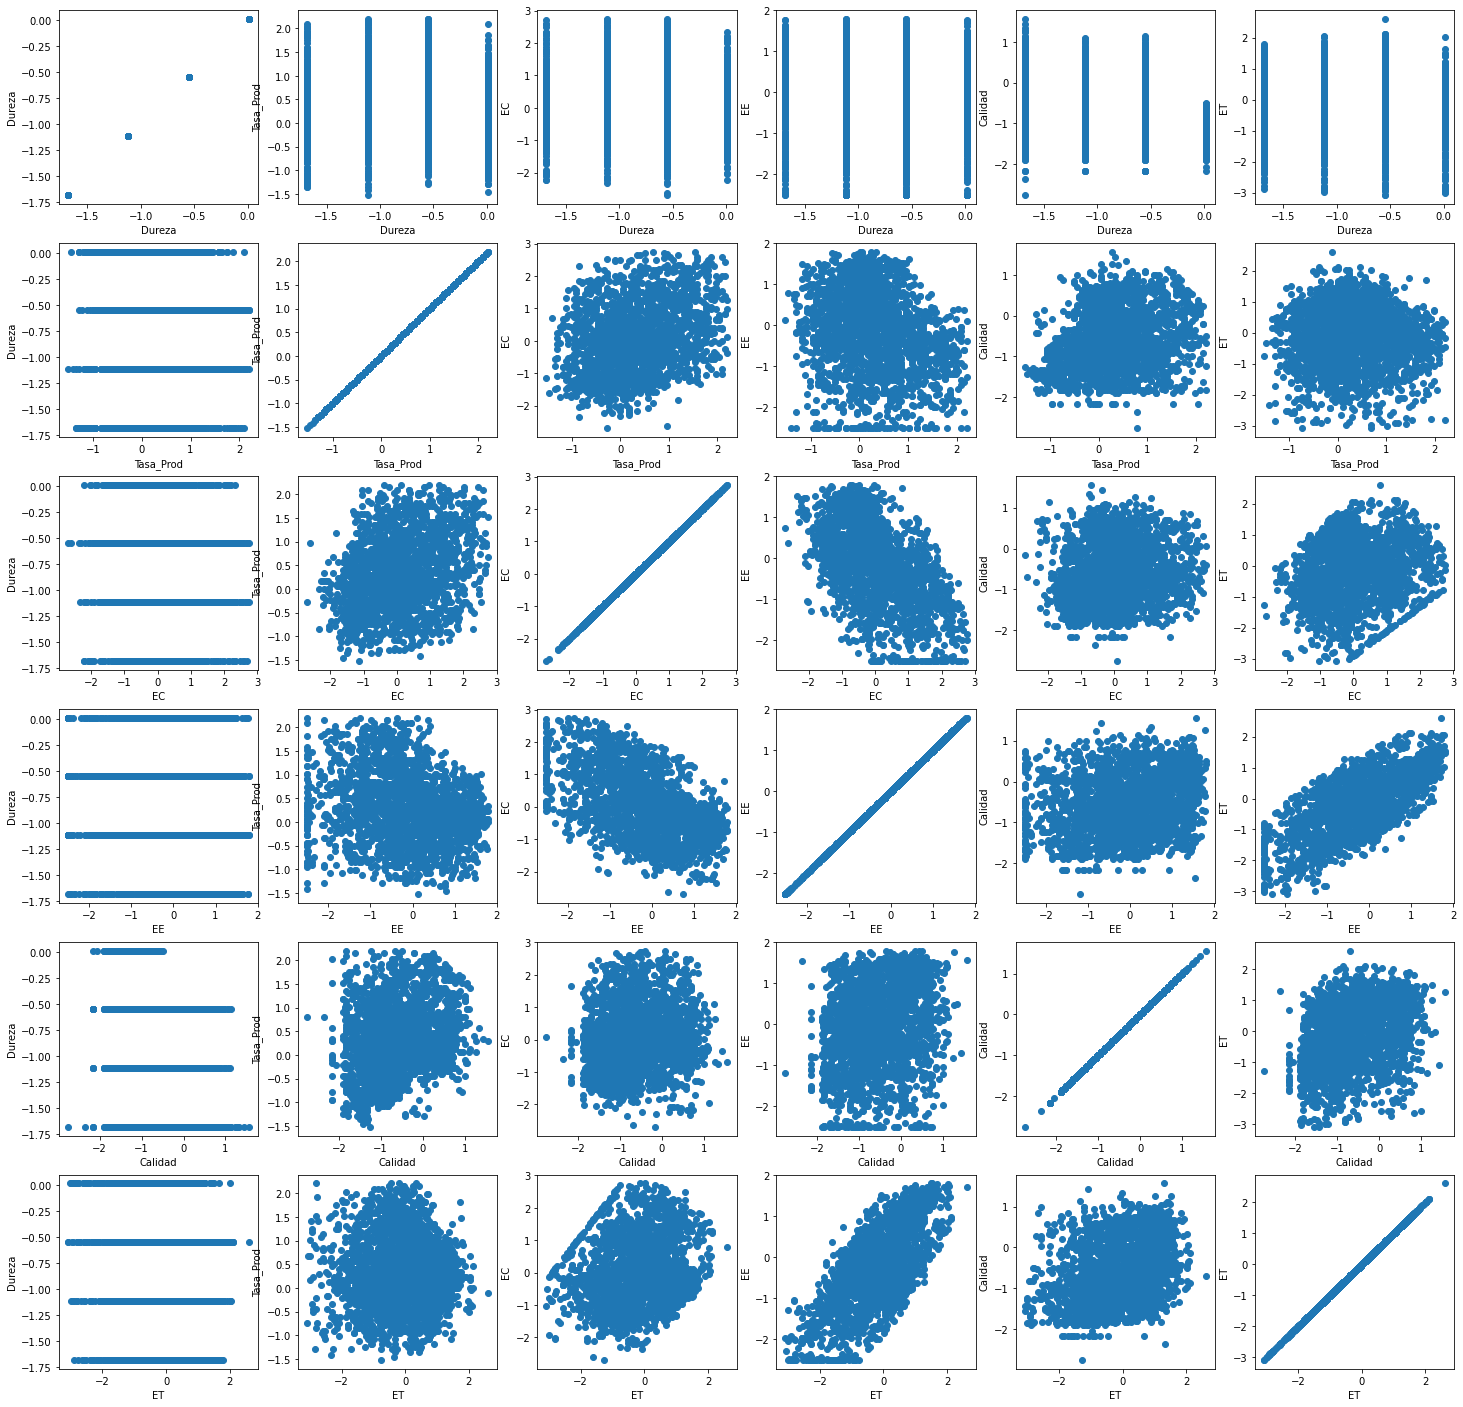

In [74]:
getTableOfScatters(cluster1)

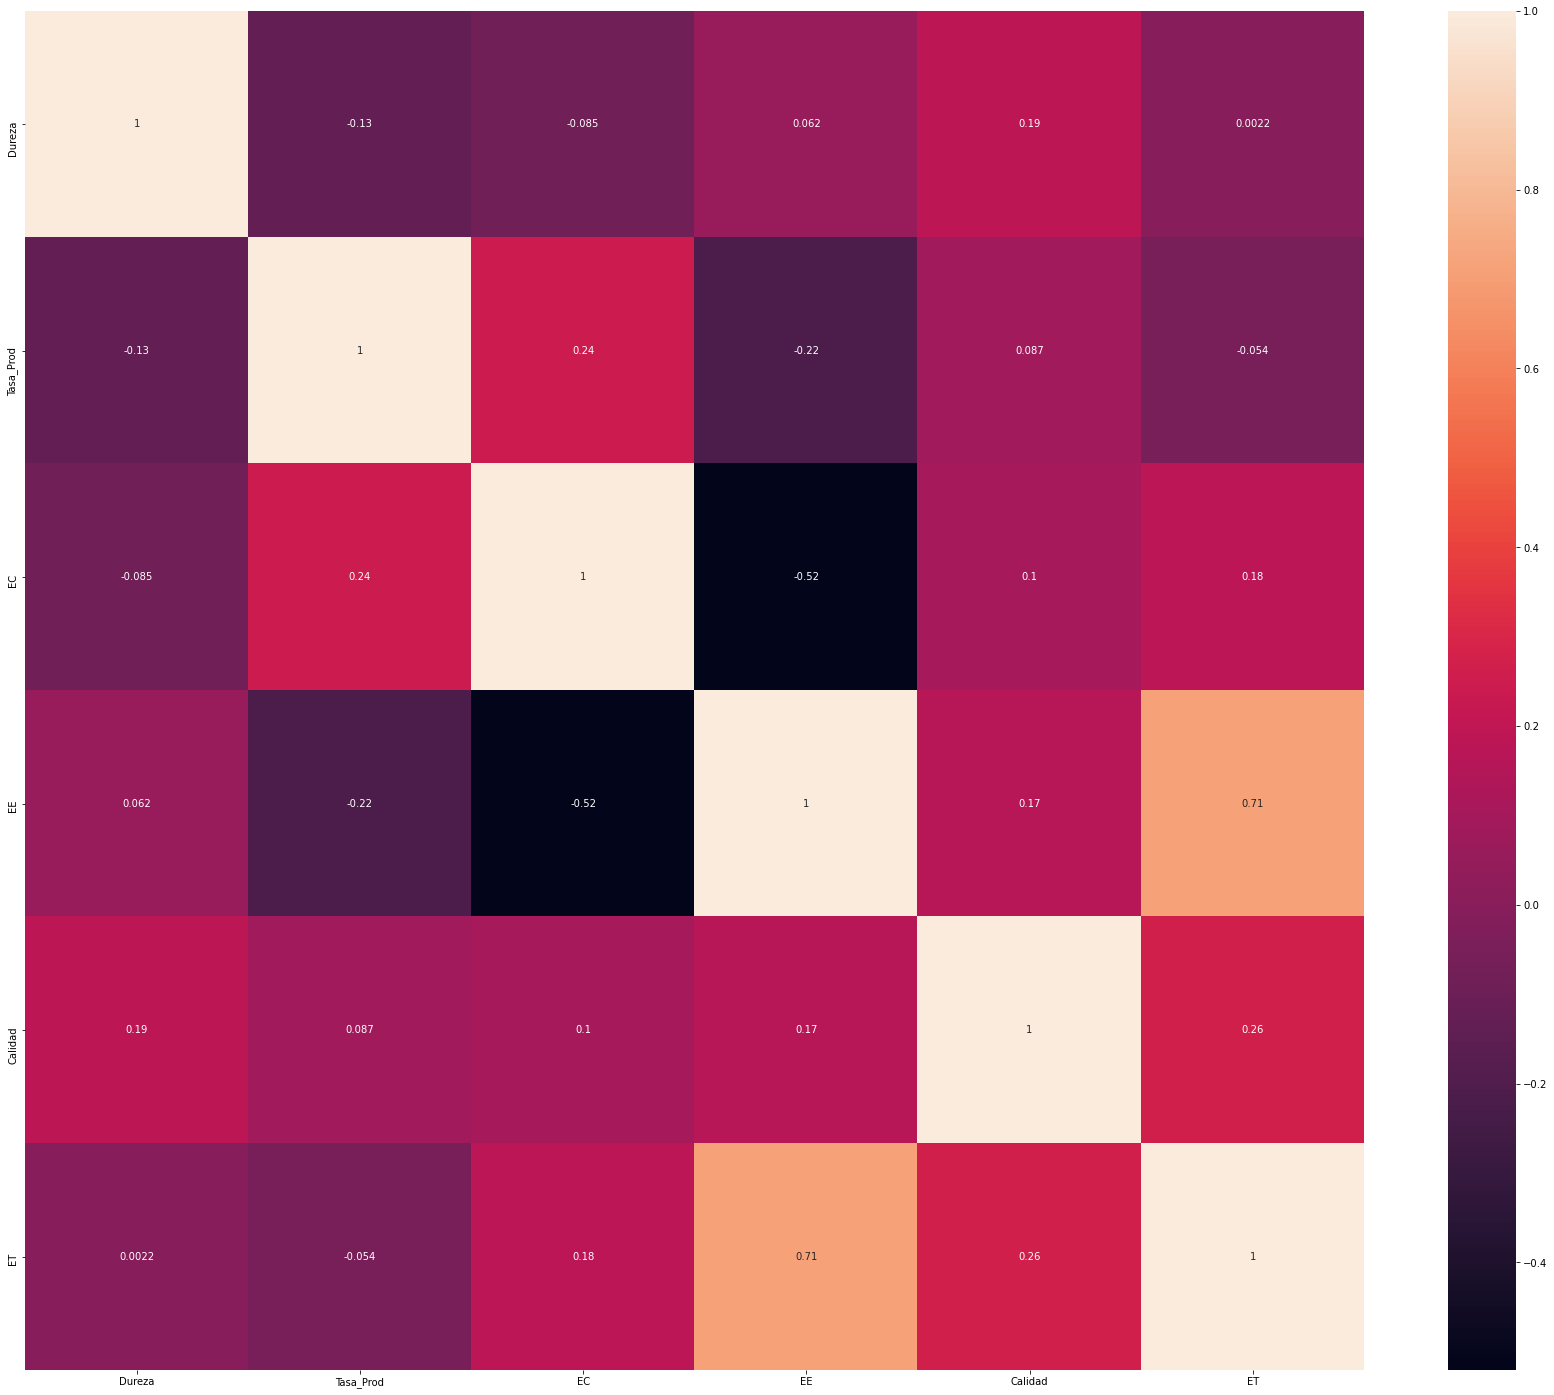

In [75]:
getHeatMap(df, 'spearman')

In [76]:
get3DChart(df, 10, 2 , 'Cluster 1 3D')

Archivo en: file:///Users/sebastianneri/Documents/4o Semestre/Análisis de Cienca de Datos/Situación Problema/cemexVenturesEnergyEfficiencyModelApp/research/Cluster 1 3D.html


In [80]:
X = cluster1.drop(['EE', 'EC', 'ET'], axis=1)
Y = cluster1["ET"]

### Cluster 2

In [63]:
cluster2 = df[y_hc == 1]
cluster2.describe()

Dureza    Tasa_Prod           EC           EE      Calidad  \
count  1038.000000  1038.000000  1038.000000  1038.000000  1038.000000   
mean     -0.045016     0.703324     0.293620    -0.061587     1.408983   
std       0.812941     0.961070     0.985595     1.007883     0.621895   
min      -2.246123    -2.543101    -2.828919    -2.504670     0.003785   
25%      -0.552043     0.002099    -0.420515    -0.667791     0.934924   
50%       0.012650     0.567700     0.114686     0.057207     1.367238   
75%       0.577343     1.529220     1.051288     0.678170     1.866062   
max       2.271423     2.547300     2.752462     1.786799     2.763945   

                ET  
count  1038.000000  
mean      0.160062  
std       0.908677  
min      -3.398457  
25%      -0.325397  
50%       0.179248  
75%       0.815702  
max       2.054718

### Cluster 3

In [64]:
cluster3 = df[y_hc == 2]
cluster3.describe()

Dureza    Tasa_Prod           EC           EE      Calidad  \
count  1513.000000  1513.000000  1513.000000  1513.000000  1513.000000   
mean      0.249276    -1.215941    -0.208893     0.054380    -0.385141   
std       0.805739     0.570384     0.994365     0.966974     0.642195   
min      -2.246123    -2.599661    -2.503976    -2.504670    -2.157785   
25%      -0.552043    -1.581581    -0.993945    -0.527993    -0.827588   
50%       0.012650    -1.129101    -0.324943     0.135234    -0.395274   
75%       0.577343    -0.789741     0.496972     0.785457     0.003785   
max       2.271423    -0.054461     2.676005     1.981866     1.300728   

                ET  
count  1513.000000  
mean     -0.101637  
std       1.014116  
min      -4.678898  
25%      -0.717061  
50%       0.036140  
75%       0.593508  
max       2.280678

### Cluster 4

In [65]:
cluster4 = df[y_hc == 3]
cluster4.describe()

Dureza    Tasa_Prod           EC           EE      Calidad  \
count  1556.000000  1556.000000  1556.000000  1556.000000  1556.000000   
mean      0.489155     0.498126     0.038143    -0.094717    -0.243126   
std       0.448074     0.641197     1.036276     0.967990     0.604279   
min       0.012650    -0.902861    -2.389290    -2.504670    -2.324060   
25%       0.012650     0.002099    -0.745458    -0.658037    -0.694568   
50%       0.577343     0.398020    -0.133800     0.070212    -0.228999   
75%       0.577343     0.850500     0.783687     0.616399     0.203315   
max       2.271423     2.547300     2.695119     1.799804     1.300728   

                ET  
count  1556.000000  
mean     -0.079658  
std       0.984301  
min      -3.579225  
25%      -0.656805  
50%       0.021076  
75%       0.608572  
max       2.190294

### Cluster 5

In [66]:
cluster5 = df[y_hc == 4]
cluster5.describe()

Dureza   Tasa_Prod          EC          EE     Calidad          ET
count  973.000000  973.000000  973.000000  973.000000  973.000000  973.000000
mean     1.306859   -0.444219   -0.163326    0.361536    0.957583    0.290076
std      0.598292    0.652303    0.848926    0.889014    0.762704    0.913053
min      0.012650   -2.543101   -2.714233   -2.504670   -1.126882   -4.121530
25%      0.577343   -0.959421   -0.726344   -0.059833    0.436100   -0.174757
50%      1.142036   -0.393821   -0.286715    0.460345    0.934924    0.412740
75%      1.706730    0.058659    0.248486    1.032541    1.467003    0.909853
max      2.271423    1.020180    2.580433    1.721777    2.763945    2.581959

In [ ]:
df.head()

In [ ]:
printTableOfScatters(cluster1)

## Regresión

In [496]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [515]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import tensorflow as tf

In [513]:
tree = DecisionTreeRegressor(random_state = 42).fit(X_train, Y_train)
svr = SVR(kernel="linear").fit(X_train, Y_train)
random_tree = RandomForestRegressor(random_state = 42).fit(X_train, Y_train)

In [516]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, Y_train, batch_size = 32, epochs = 200)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

59/59 [==============================] - 0s 584us/step - loss: 1.1692
Epoch 2/200
59/59 [==============================] - 0s 568us/step - loss: 1.0866
Epoch 3/200
59/59 [==============================] - 0s 527us/step - loss: 1.0362
Epoch 4/200
59/59 [==============================] - 0s 700us/step - loss: 0.9982
Epoch 5/200
59/59 [==============================] - 0s 539us/step - loss: 0.9712
Epoch 6/200
59/59 [==============================] - 0s 764us/step - loss: 0.9549
Epoch 7/200
59/5

59/59 [==============================] - 0s 486us/step - loss: 0.8891
Epoch 92/200
59/59 [==============================] - 0s 464us/step - loss: 0.8885
Epoch 93/200
59/59 [==============================] - 0s 504us/step - loss: 0.8885
Epoch 94/200
59/59 [==============================] - 0s 500us/step - loss: 0.8875
Epoch 95/200
59/59 [==============================] - 0s 472us/step - loss: 0.8872
Epoch 96/200
59/59 [==============================] - 0s 480us/step - loss: 0.8871
Epoch 97/200
59/59 [==============================] - 0s 473us/step - loss: 0.8875
Epoch 98/200
59/59 [==============================] - 0s 481us/step - loss: 0.8870
Epoch 99/200
59/59 [==============================] - 0s 501us/step - loss: 0.8864
Epoch 100/200
59/59 [==============================] - 0s 541us/step - loss: 0.8870
Epoch 101/200
59/59 [==============================] - 0s 502us/step - loss: 0.8864
Epoch 102/200
59/59 [==============================] - 0s 641us/step - loss: 0.8867
Epoch 103/200


59/59 [==============================] - 0s 545us/step - loss: 0.8762
Epoch 189/200
59/59 [==============================] - 0s 549us/step - loss: 0.8764
Epoch 190/200
59/59 [==============================] - 0s 511us/step - loss: 0.8765
Epoch 191/200
59/59 [==============================] - 0s 486us/step - loss: 0.8761
Epoch 192/200
59/59 [==============================] - 0s 473us/step - loss: 0.8764
Epoch 193/200
59/59 [==============================] - 0s 481us/step - loss: 0.8753
Epoch 194/200
59/59 [==============================] - 0s 458us/step - loss: 0.8759
Epoch 195/200
59/59 [==============================] - 0s 508us/step - loss: 0.8767
Epoch 196/200
59/59 [==============================] - 0s 486us/step - loss: 0.8764
Epoch 197/200
59/59 [==============================] - 0s 484us/step - loss: 0.8752
Epoch 198/200
59/59 [==============================] - 0s 481us/step - loss: 0.8757
Epoch 199/200
59/59 [==============================] - 0s 479us/step - loss: 0.8743
Epoch 

In [517]:
y_pred = ann.predict(X_test)
mean_squared_error(Y_test, y_pred)

0.9253108043263117

In [501]:
folds = KFold(n_splits = 10, shuffle = True)
scores = cross_val_score(tree, X_train, Y_train, cv=folds)
np.mean(scores)

-0.7352407019963821

In [506]:
y_pred = random_tree.predict(X_test)
mean_squared_error(Y_test, y_pred)

1.100871617138748

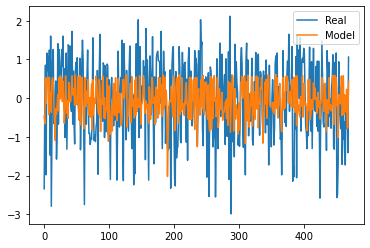

In [512]:
plt.plot(np.arange(Y_test.shape[0]), Y_test, label = "Real")
plt.plot(np.arange(y_pred.shape[0]), y_pred, label = "Model")
plt.legend()

In [414]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, booster='gbtree')
xgb_model.fit(X, Y)
y_pred = xgb_model.predict(X_test)
mean_absolute_error(Y_test, y_pred)

0.7891527856580908

In [415]:
Y_test.shape[0]

1536

In [416]:
scores = cross_val_score(xgb_model, X_train, Y_train, cv=folds)
np.mean(scores)

-0.033897255719582665

In [417]:
X_train.shape[0]/5

1228.4